In [140]:
#Task 1 - Movie Genre Classification

In [109]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score



In [110]:
# load the datset
df = pd.read_csv(
    r"C:\Users\Wintewarrior\Downloads\archive\Genre Classification Dataset\train_data.txt",
    sep=":::",
    engine="python",
    names=["ID", "Title", "Genre", "Description"]
)

df.head()


,ID,Title,Genre,Description
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [111]:
train_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54214 entries, 0 to 54213
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ID             54214 non-null  int64 
 1   Title          54214 non-null  object
 2   Genre          54214 non-null  object
 3   Description    54214 non-null  object
 4   Text_cleaning  54214 non-null  object
dtypes: int64(1), object(4)
memory usage: 2.1+ MB


In [112]:
train_data['Genre'].value_counts()


Genre
drama           13613
documentary     13096
comedy           7447
short            5073
horror           2204
thriller         1591
action           1315
western          1032
reality-tv        884
family            784
adventure         775
music             731
romance           672
sci-fi            647
adult             590
crime             505
animation         498
sport             432
talk-show         391
fantasy           323
mystery           319
musical           277
biography         265
history           243
game-show         194
news              181
war               132
Name: count, dtype: int64

In [113]:
(train_data.isna().mean() * 100).round(2)


ID               0.0
Title            0.0
Genre            0.0
Description      0.0
Text_cleaning    0.0
dtype: float64

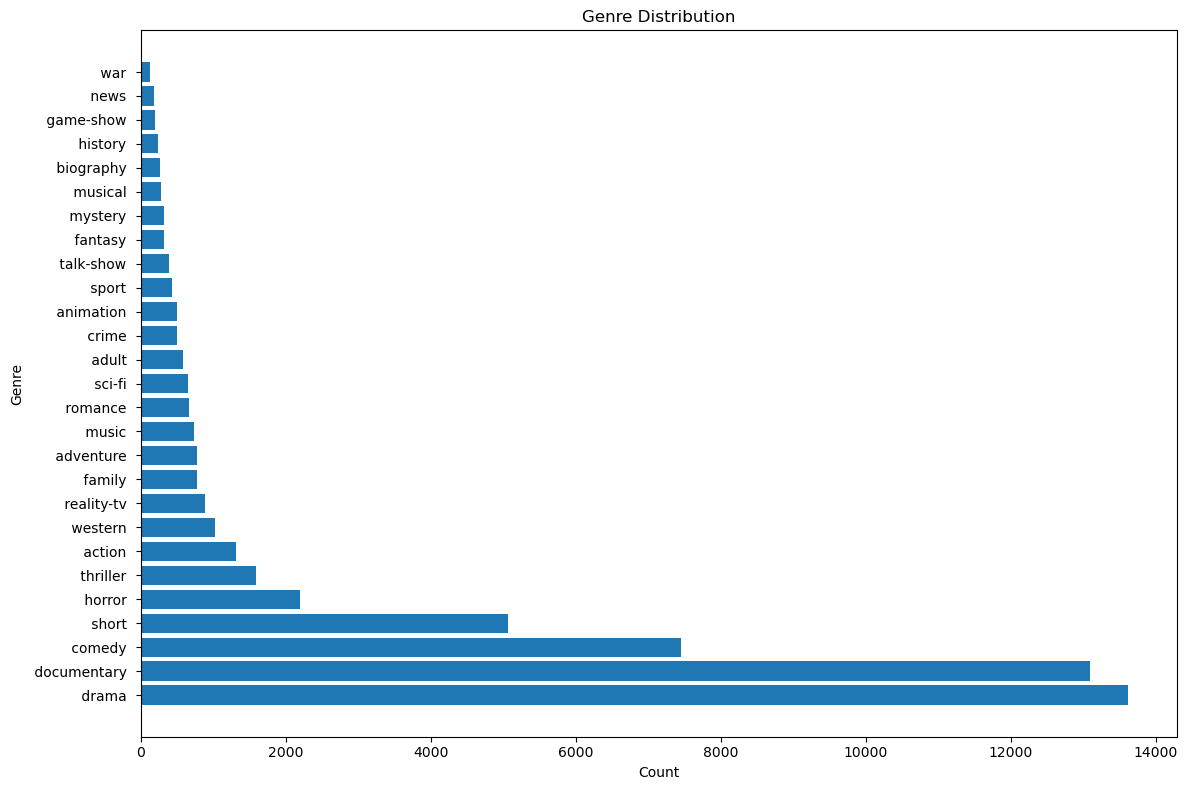

In [114]:
# Data visualizations
import matplotlib.pyplot as plt

counts = train_data['Genre'].value_counts()

plt.figure(figsize=(12, 8))
plt.barh(counts.index, counts.values)
plt.xlabel("Count")
plt.ylabel("Genre")
plt.title("Genre Distribution")
plt.tight_layout()
plt.show()


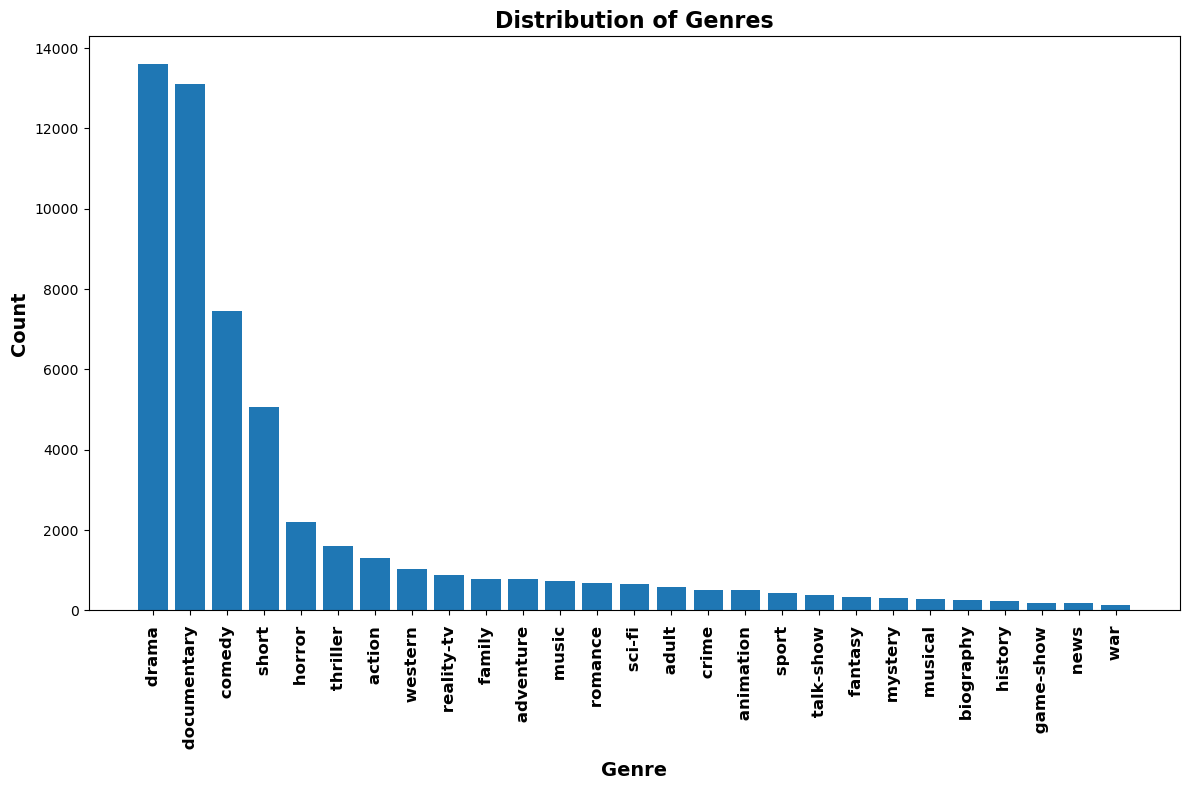

In [115]:
import matplotlib.pyplot as plt

counts = train_data['Genre'].value_counts()

plt.figure(figsize=(12, 8))
plt.bar(range(len(counts)), counts.values)

plt.xlabel('Genre', fontsize=14, fontweight='bold')
plt.ylabel('Count', fontsize=14, fontweight='bold')
plt.title('Distribution of Genres', fontsize=16, fontweight='bold')

plt.xticks(
    ticks=range(len(counts)),
    labels=counts.index,
    rotation=90,
    fontsize=12,
    fontweight='bold'
)

plt.tight_layout()
plt.show()


In [116]:
train_data['length'] = train_data['Description'].str.len()
train_data.head()


,ID,Title,Genre,Description,Text_cleaning,length
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,listening conversation doctor parents yearold ...,546
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,brother sister past incestuous relationship cu...,184
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,bus empties students field trip museum natural...,650
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,help unemployed father make ends meet edith tw...,1082
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,films title refers unrecovered bodies ground z...,625


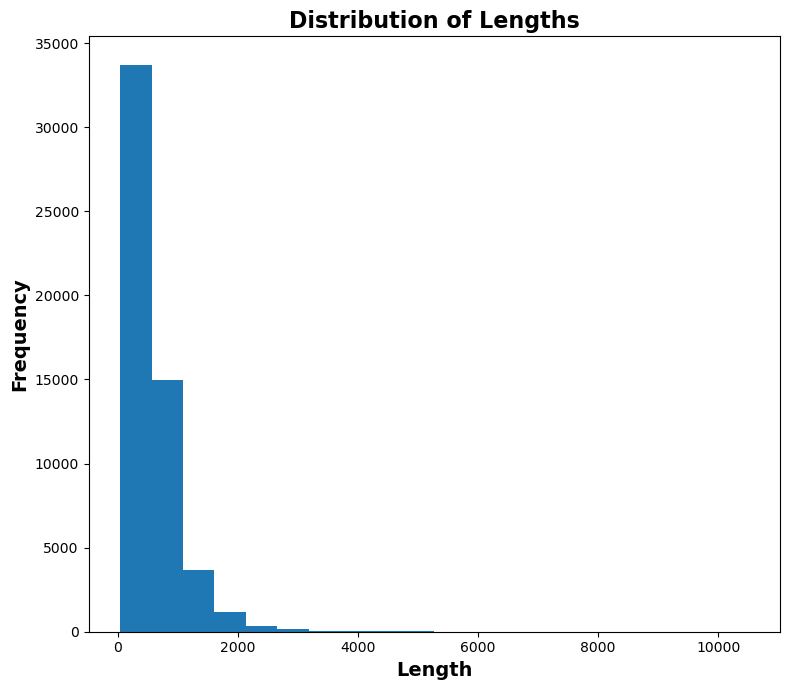

In [117]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 7))

plt.hist(train_data['length'], bins=20)

plt.xlabel('Length', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')
plt.title('Distribution of Lengths', fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()


In [118]:
# Data cleaning and preprocessing
import nltk

nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('wordnet')
nltk.download('stopwords')



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Wintewarrior\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Wintewarrior\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Wintewarrior\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Wintewarrior\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [119]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import re
import string
import nltk

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = re.sub(r'http\S+|www\S+|@\S+', '', text)
    text = re.sub(r'\d+', '', text) 
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = nltk.word_tokenize(text)  
    tokens = [
        lemmatizer.lemmatize(word)
        for word in tokens
        if word not in stop_words and len(word) > 2
    ]
    text = " ".join(tokens)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

input_text = "Certainly you get a dramatic boost from hello bye the the hi -iv iem-k q934*2yee !*3 2e38"
print("Original text:", input_text)
print("Cleaned text:", clean_text(input_text))



Original text: Certainly you get a dramatic boost from hello bye the the hi -iv iem-k q934*2yee !*3 2e38
Cleaned text: certainly get dramatic boost hello bye iemk qyee


In [120]:
train_data['Text_cleaning'] = [
    clean_text(text) for text in train_data['Description']
]

test_data['Text_cleaning'] = [
    clean_text(text) for text in test_data['Description']
]

train_data.head()


,ID,Title,Genre,Description,Text_cleaning,length
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,listening conversation doctor parent yearold o...,546
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,brother sister past incestuous relationship cu...,184
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,bus empty student field trip museum natural hi...,650
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,help unemployed father make end meet edith twi...,1082
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,film title refers unrecovered body ground zero...,625


In [121]:
train_data['length_Text_cleaning'] = train_data['Text_cleaning'].str.len()
train_data.head()


,ID,Title,Genre,Description,Text_cleaning,length,length_Text_cleaning
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,listening conversation doctor parent yearold o...,546,370
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,brother sister past incestuous relationship cu...,184,117
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,bus empty student field trip museum natural hi...,650,386
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,help unemployed father make end meet edith twi...,1082,728
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,film title refers unrecovered body ground zero...,625,409


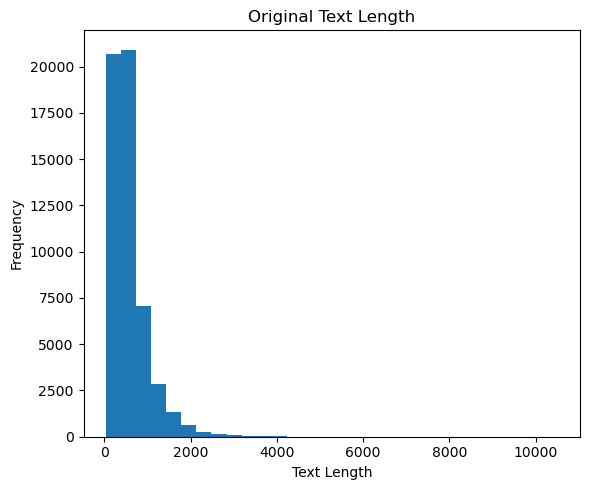

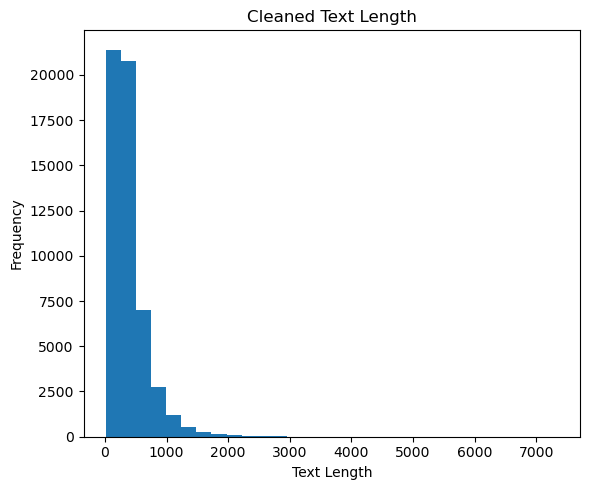

In [122]:
import matplotlib.pyplot as plt

original_lengths = train_data['Description'].str.len()

plt.figure(figsize=(6, 5))
plt.hist(original_lengths, bins=30)
plt.title('Original Text Length')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

cleaned_lengths = train_data['Text_cleaning'].str.len()

plt.figure(figsize=(6, 5))
plt.hist(cleaned_lengths, bins=30)
plt.title('Cleaned Text Length')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


In [123]:
pd.cut(
    train_data['length_Text_cleaning'],
    bins=[0, 2000, train_data['length_Text_cleaning'].max()],
    labels=['<=2000', '>2000']
).value_counts()


length_Text_cleaning
<=2000    54037
>2000       177
Name: count, dtype: int64

In [124]:
print('Dataframe size (before removal):', len(train_data))

removed_rows = (train_data['length_Text_cleaning'] > 2000).sum()

train_data = train_data[train_data['length_Text_cleaning'] <= 2000]

print('Dataframe size (after removal):', len(train_data))
print(f'Removed rows: {removed_rows}')


Dataframe size (before removal): 54214
Dataframe size (after removal): 54037
Removed rows: 177


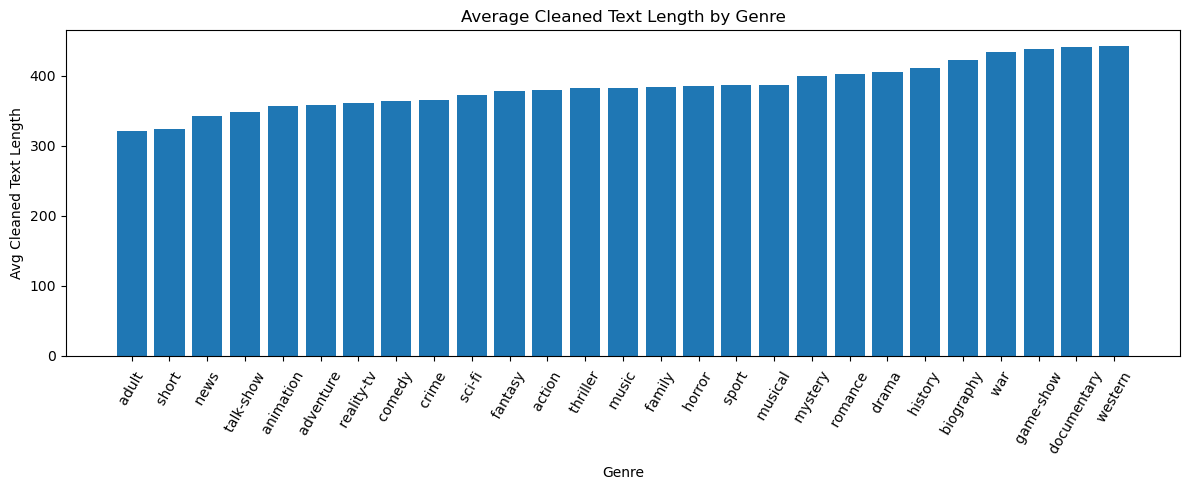

C:\Users\Wintewarrior\AppData\Local\Temp\ipykernel_4600\3458869395.py:20: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_by_genre, labels=train_data['Genre'].unique(), vert=False)


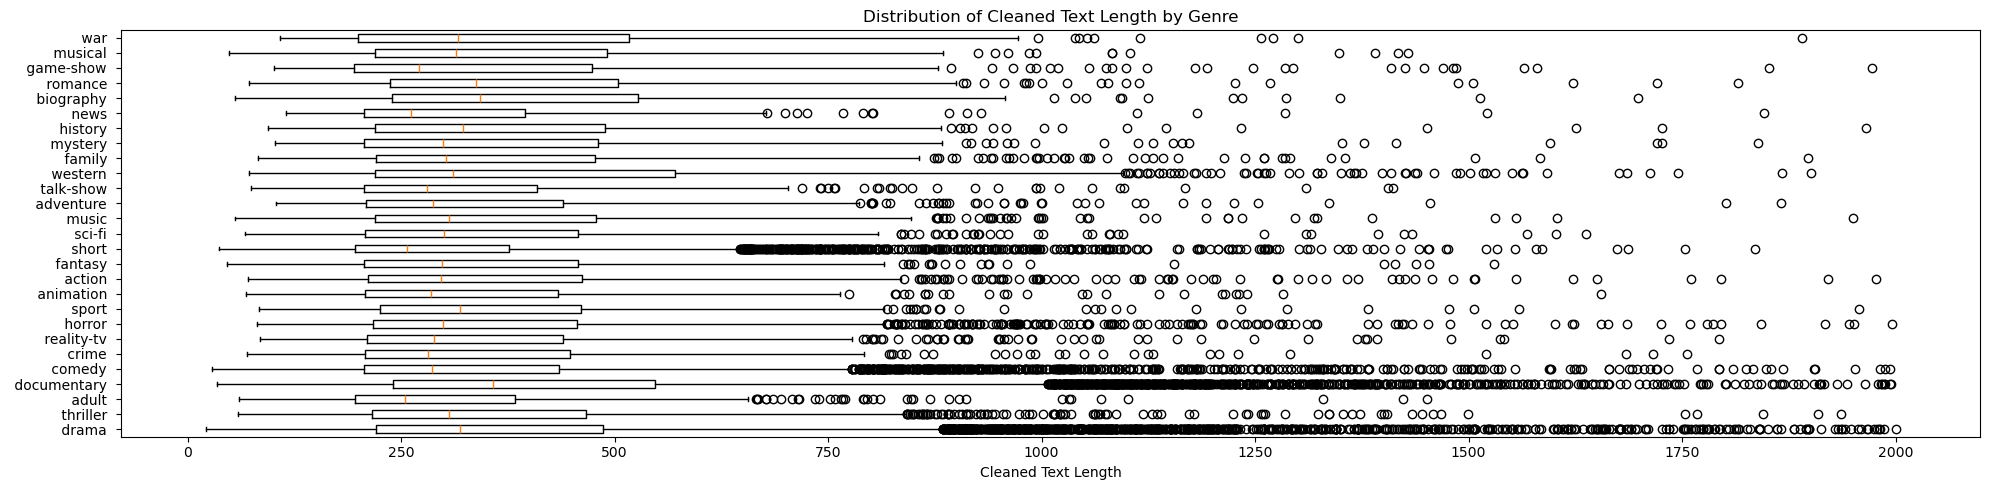

In [125]:
import matplotlib.pyplot as plt

genre_means = train_data.groupby('Genre')['length_Text_cleaning'].mean().sort_values()

plt.figure(figsize=(12, 5))
plt.bar(genre_means.index, genre_means.values)
plt.xticks(rotation=60)
plt.xlabel('Genre')
plt.ylabel('Avg Cleaned Text Length')
plt.title('Average Cleaned Text Length by Genre')
plt.tight_layout()
plt.show()

plt.figure(figsize=(20, 5))
data_by_genre = [
    train_data.loc[train_data['Genre'] == g, 'length_Text_cleaning'].values
    for g in train_data['Genre'].unique()
]

plt.boxplot(data_by_genre, labels=train_data['Genre'].unique(), vert=False)
plt.xlabel('Cleaned Text Length')
plt.title('Distribution of Cleaned Text Length by Genre')
plt.tight_layout()
plt.show()


In [126]:
# Text tokenization and vectorization
from sklearn.feature_extraction.text import TfidfVectorizer

max_features = 50000

vectorizer = TfidfVectorizer(
    max_features=max_features,
    lowercase=True
)

vectorizer.fit(train_data['Text_cleaning'])


,input,'content'
,encoding,'utf-8'
,decode_error,'strict'
,strip_accents,None
,lowercase,True
,preprocessor,None
,tokenizer,None
,analyzer,'word'
,stop_words,None
,token_pattern,'(?u)\\b\\w\\w+\\b'
,ngram_range,"(1, ...)"


In [127]:
test_path = r"C:\Users\Wintewarrior\Downloads\archive\Genre Classification Dataset\test_data_solution.txt"

test_data_solution = pd.read_csv(
    test_path,
    sep=':::',
    engine='python',
    names=['ID', 'Title', 'Genre', 'Description'],
    encoding='utf-8'
)

test_data_solution.head()


,ID,Title,Genre,Description
0,1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),drama,Before he was known internationally as a mart...


In [128]:
import pandas as pd

test_path = r"C:\Users\Wintewarrior\Downloads\archive\Genre Classification Dataset\train_data.txt"

train_data = pd.read_csv(
    test_path,
    sep=':::',
    engine='python',
    names=['ID', 'Title', 'Genre', 'Description'],
    encoding='utf-8'
)

train_data.head()



,ID,Title,Genre,Description
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [129]:
# Text Vectorization (TF-IDF)
import re
import string
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

def clean_text(text):
    text = text.lower()
    text = re.sub(r'http\S+|www\S+|@\S+', '', text)
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = text.split()
    tokens = [w for w in tokens if w not in ENGLISH_STOP_WORDS and len(w) > 2]
    return " ".join(tokens)


In [130]:
train_data['Text_cleaning'] = train_data['Description'].apply(clean_text)
test_data['Text_cleaning']  = test_data['Description'].apply(clean_text)


In [131]:
print(train_data.columns)
print(test_data.columns)


Index(['ID', 'Title', 'Genre', 'Description', 'Text_cleaning'], dtype='object')
Index(['ID', 'Title', 'Genre', 'Description', 'Text_cleaning',
       'Predicted_Genre'],
      dtype='object')


In [132]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=50000)

X_train = vectorizer.fit_transform(train_data['Text_cleaning'].tolist())
X_test  = vectorizer.transform(test_data['Text_cleaning'].tolist())


In [133]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(
    lowercase=True,
    max_features=50000
)

X_train = vectorizer.fit_transform(
    train_data['Text_cleaning'].tolist()
)

X_test = vectorizer.transform(
    test_data['Text_cleaning'].tolist()
)



In [134]:
# Split Data and Train a Model (Naive Bayes)
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, classification_report

X_tr, X_val, y_tr, y_val = train_test_split(
    X_train,
    train_data['Genre'],
    test_size=0.2,
    random_state=42,
    stratify=train_data['Genre']
)

classifier = BernoulliNB()
classifier.fit(X_tr, y_tr)

y_pred = classifier.predict(X_val)

print("Validation Accuracy:", accuracy_score(y_val, y_pred))
print(classification_report(y_val, y_pred))


Validation Accuracy: 0.5313105229180116
               precision    recall  f1-score   support

      action        0.47      0.08      0.14       263
       adult        1.00      0.02      0.03       118
   adventure        0.50      0.02      0.04       155
   animation        0.00      0.00      0.00       100
   biography        0.00      0.00      0.00        53
      comedy        0.46      0.60      0.52      1490
       crime        0.00      0.00      0.00       101
 documentary        0.62      0.86      0.72      2619
       drama        0.50      0.78      0.61      2723
      family        0.00      0.00      0.00       157
     fantasy        0.00      0.00      0.00        65
   game-show        1.00      0.03      0.05        39
     history        0.00      0.00      0.00        49
      horror        0.67      0.30      0.42       441
       music        0.67      0.03      0.05       146
     musical        0.00      0.00      0.00        55
     mystery        0.50

C:\Users\Wintewarrior\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\Wintewarrior\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\Wintewarrior\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


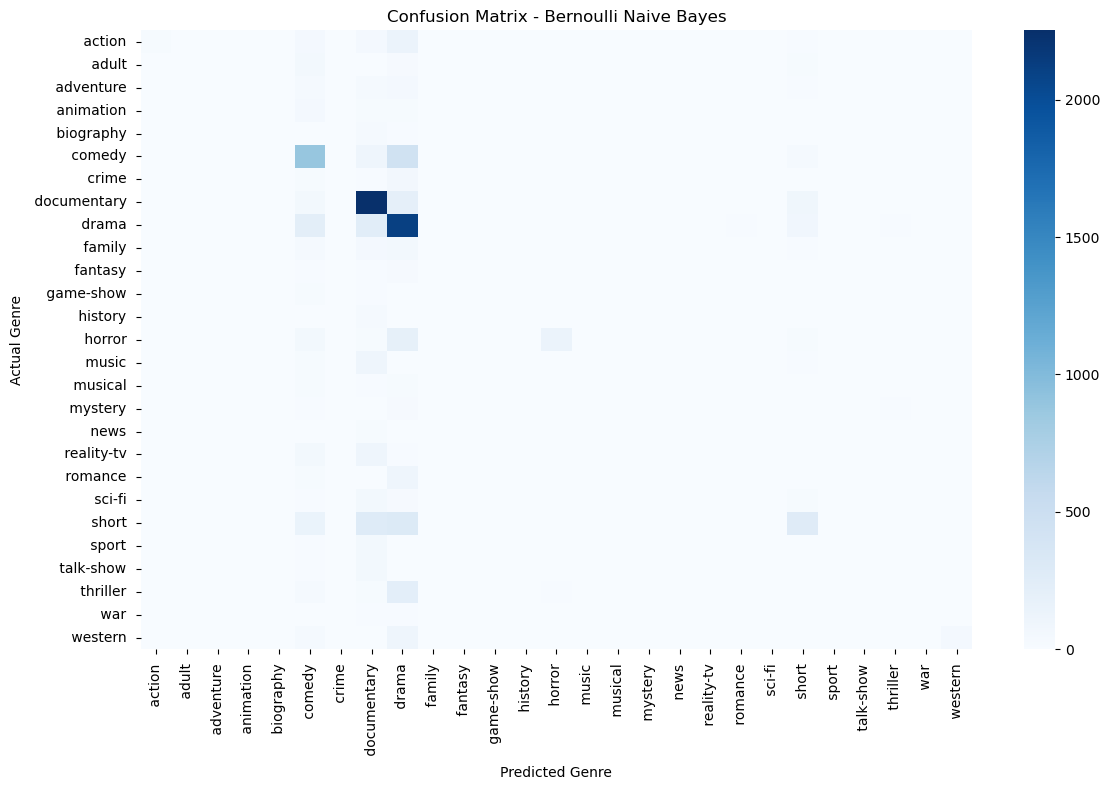

In [139]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_val, y_pred, labels=classifier.classes_)

plt.figure(figsize=(12, 8))
sns.heatmap(cm, cmap='Blues', xticklabels=classifier.classes_,
            yticklabels=classifier.classes_, fmt='d')
plt.xlabel('Predicted Genre')
plt.ylabel('Actual Genre')
plt.title('Confusion Matrix - Bernoulli Naive Bayes')
plt.tight_layout()
plt.show()



In [ ]:
#CodSoft Internship Report
Task: Movie Genre Classification using Machine Learning

Intern Name: Mahendra Hanamant Bidarbhavikar
Internship Domain: Machine Learning
Organization: CodSoft
Task Title: Movie Genre Classification
Programming Language: Python
Duration: 10 January 2026 - 10 February 2026

#1. Introduction
As part of the CodSoft Machine Learning Internship, I was assigned the task of building a Movie Genre Classification system. The objective of this project is to automatically predict the genre of a movie based on its textual description using Natural Language Processing (NLP) and Machine Learning techniques.
This task helped me understand real-world text preprocessing, feature extraction, model training, and evaluation workflows used in practical ML applications.

#2. Problem Statement
Movies often contain textual descriptions or plots that provide insight into their genre. Manually categorizing such content is time-consuming and error-prone.
The goal of this project is to:Predict the genre of a movie using its description text.

#3. Dataset Description
The dataset used in this project contains movie metadata stored in a text file format. Each record includes:
* Title – Name of the movie
* Genre – Target label (e.g., Drama, Thriller, Comedy, etc.)
* Description – Textual summary of the movie

#4. Tools & Technologies Used
* Python
* Pandas & NumPy – Data handling
* Scikit-learn – Machine learning models
* Matplotlib & Seaborn – Data visualization
* TF-IDF Vectorizer – Feature extraction
* Naive Bayes Classifier – Model training
* Jupyter Notebook – Development environment

#5. Methodology
1) Data Preprocessing
* Converted all text to lowercase
* Removed punctuation, digits, URLs, and unnecessary symbols
* Removed stopwords
* Cleaned text using a custom clean_text() function

2) Feature Extraction
* Used TF-IDF (Term Frequency–Inverse Document Frequency) to convert text descriptions into numerical feature vectors
* This technique helps in capturing the importance of words while reducing noise from frequently occurring terms.

3) Model Training
* Applied Bernoulli Naive Bayes, which is well-suited for text classification tasks.
* Split training data into training and validation sets.
* Trained the model on the TF-IDF features.

4) Model Evaluation
* The model performance was evaluated using:
* Accuracy Score
* Classification Report (Precision, Recall, F1-Score)
* Confusion Matrix
* Validation Accuracy Plot

This approach is appropriate since Naive Bayes does not train iteratively like deep learning models.

#6. Results
* The model successfully classified movie genres based on descriptions.
* Achieved a reasonable validation accuracy considering the complexity and overlap of genres.
* Confusion matrix analysis showed areas where genre overlap occurs, such as Drama vs Romance.

#7. Output Generation
* Predicted genres for test data were stored in a text file (predicted_genres.txt).
* Output format was kept consistent with the original dataset delimiter.

#8. Key Learnings
* Practical NLP preprocessing techniques
* Importance of feature extraction in text-based ML tasks
* Difference between deep learning and classical ML evaluation methods
* How to debug and structure ML pipelines step-by-step
* Importance of clean, readable, and modular code

#9. Conclusion
This project successfully demonstrates how Machine Learning can be applied to solve real-world text classification problems. The use of TF-IDF with Naive Bayes provided an efficient and interpretable solution.
Overall, this task strengthened my understanding of NLP workflows and prepared me for more advanced ML challenges.

#10. Acknowledgement
I would like to thank CodSoft for providing this internship opportunity and a well-structured task that enhanced my practical Machine Learning skills.
    